# Classification Problem


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_regression,f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier


### Data Fetch
 Pandas is an open-source, BSD-licensed library providing high-performance,easy-to-use data manipulation and data analysis tools.

In [2]:
# Data Fetch
file='train.csv'
df=pd.read_csv(file)
df.shape


(103904, 25)

In [3]:
file='test.csv'
df_test=pd.read_csv(file)
df_test.shape

(25976, 25)

In [4]:
frames = [df, df_test]
df = pd.concat(frames)
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Feature Selection
 It is the process of reducing the number of input variables when developing a predictive model.Used to reduce the number of input variables to reduce the computational cost of modelling and,in some cases,to improve the performance of the model.

In [6]:
# Selected Columns
features=['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target='satisfaction'
# X & Y
X=df[features]
Y=df[target]


### Data Preprocessing
 Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value,we have to explicitly remove or replace null values.The below snippet have functions, which removes the null value if any exists.

In [7]:
# Data Cleaning
def NullClearner(value):
	if(isinstance(value, pd.Series) and (value.dtype in ['float64','int64'])):
		value.fillna(value.mean(),inplace=True)
		return value
	elif(isinstance(value, pd.Series)):
		value.fillna(value.mode()[0],inplace=True)
		return value
	else:return value
x=X.columns.to_list()
for i in x:
	X[i]=NullClearner(X[i])
Y=NullClearner(Y)


### Data Encoding
 Converting the string classes data in the datasets by encoding them to integer either using OneHotEncoding or LabelEncoding

In [8]:
# Handling AlphaNumeric Features
X=pd.get_dummies(X)
# Handling Target Encoding
def EncodeY(Y):
	actual_target=np.sort(pd.unique(Y), axis=-1, kind='mergesort')
	Y=LabelEncoder().fit_transform(Y)
	encoded_target=[xi for xi in range(len(actual_target))]
	print('Encoded Target: {} to {}'.format(actual_target,encoded_target))
	return Y
Y=EncodeY(Y)


Encoded Target: ['neutral or dissatisfied' 'satisfied'] to [0, 1]


### Correlation Matrix
 In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

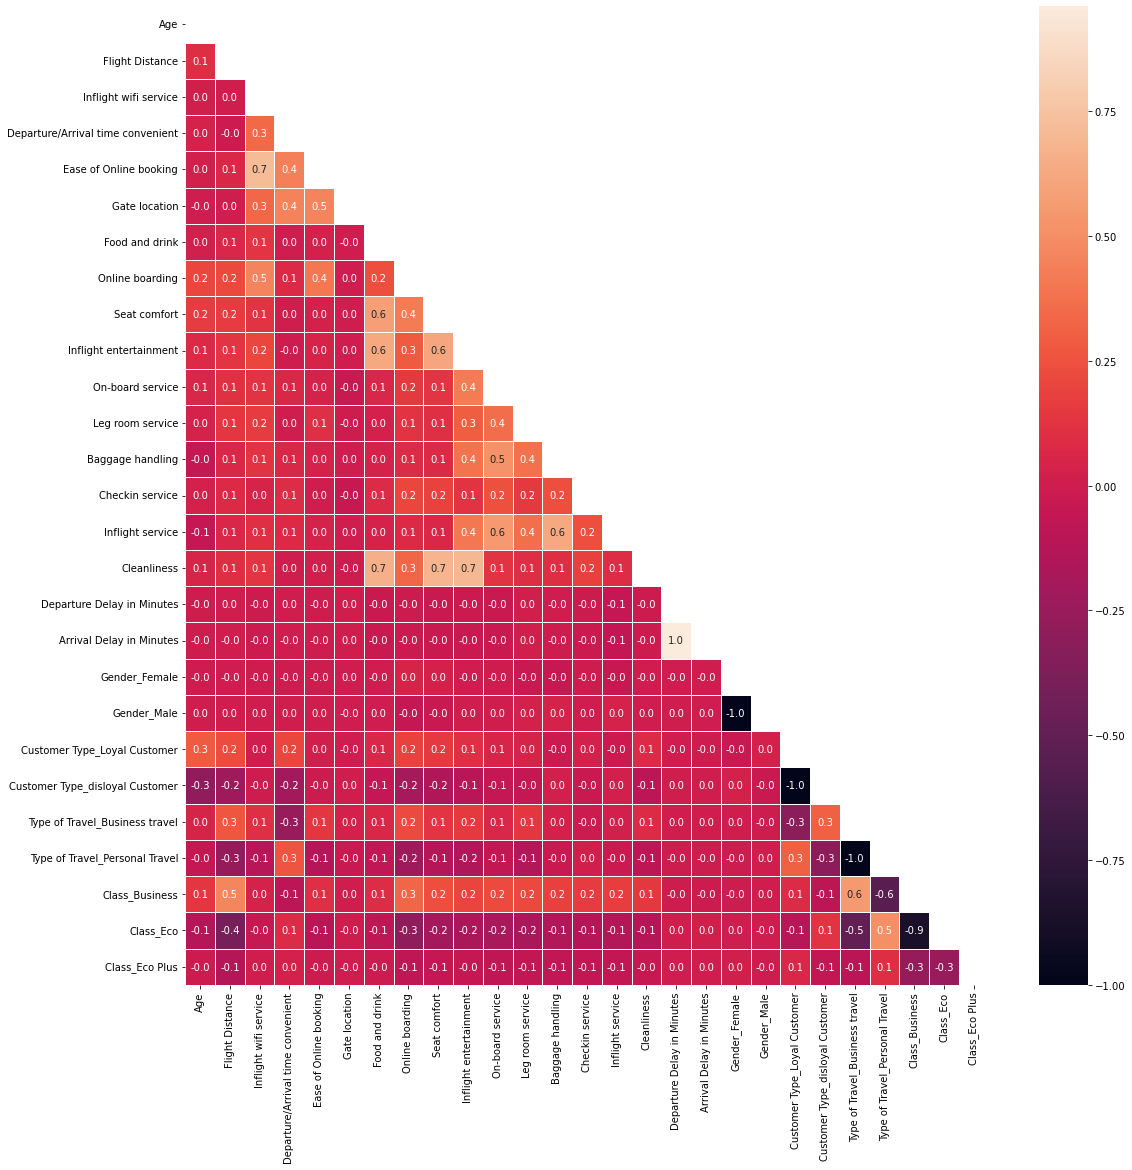

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()


### Multi-colinearity Test
 Dropping Highly Correlated Features to due similar features distributions


In [10]:
def dropHighCorrelationFeatures(X):
        cor_matrix = X.corr()
        upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
        to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
        if to_drop!=[]: return X.drop(to_drop, axis=1)
        else: return X
X=dropHighCorrelationFeatures(X)
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,25,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,11,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0,0,1,1,0,1,0,1,0,0


### Best Feature Selection
 selecting 'n' best feature on the basis of ANOVA or Univariate Linear Regression Test. where ANOVA is used for Classification problem and Univariate Linear Regression for Regression problems


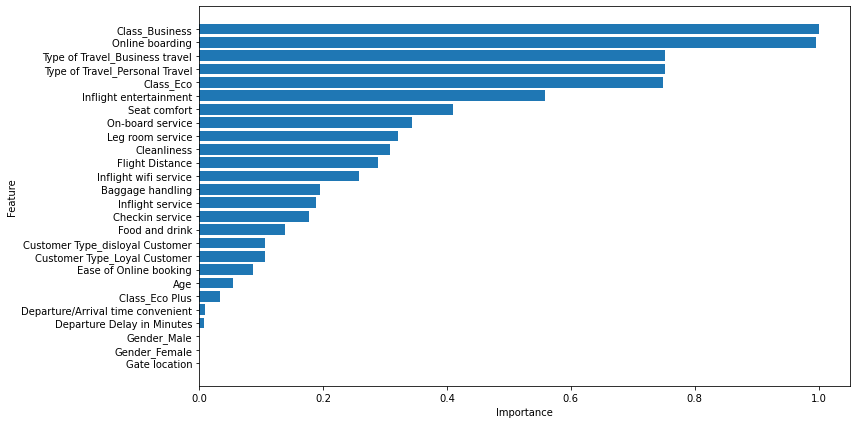

In [11]:

def get_feature_importance(X,Y,score_func):
    fit = SelectKBest(score_func=score_func, k=X.shape[1]).fit(X,Y)
    dfscores,dfcolumns = pd.DataFrame(fit.scores_),pd.DataFrame(X.columns)
    df = pd.concat([dfcolumns,dfscores],axis=1)
    df.columns = ['features','Score'] 
    df['Score']=MinMaxScaler().fit_transform(np.array(df['Score']).reshape(-1,1))
    result=dict(df.values)
    val=dict(sorted(result.items(), key=lambda item: item[1],reverse=False))
    keylist=[]
    for key, value in val.items():
        if value < 0.01: keylist.append(key)
    X=X.drop(keylist,axis=1)
    plt.figure(figsize = (12, 6))
    plt.barh(range(len(val)), list(val.values()), align='center')
    plt.yticks(range(len(val)),list(val.keys()))
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    return X
X=get_feature_importance(X,Y,score_func=f_classif)
        

### Data Rescaling
 Feature scaling or Data scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization

In [12]:
columns=X.columns
X=StandardScaler().fit_transform(X)
X=pd.DataFrame(data = X,columns = columns)
X.head()


,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Checkin service,Inflight service,Cleanliness,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.747961,-0.732184,0.204090,0.173445,1.349867,-0.187037,1.181428,1.230787,0.479357,-0.266574,...,0.547894,1.153946,1.304487,0.473422,-0.473422,-1.493951,1.493951,-0.958070,-0.902608,3.577831
1,-0.954274,-0.957760,0.204090,0.173445,-1.657814,-0.187037,-1.850520,-1.767616,-1.851475,1.252898,...,-1.821437,0.304086,-1.740402,-2.112281,2.112281,0.669366,-0.669366,1.043766,-0.902608,-0.279499
2,-0.888133,-0.048440,-0.548166,-0.539957,1.349867,1.293662,1.181428,1.230787,0.479357,-0.266574,...,0.547894,0.304086,1.304487,0.473422,-0.473422,0.669366,-0.669366,1.043766,-0.902608,-0.279499
3,-0.954274,-0.629924,-0.548166,1.600249,-0.905894,-0.927386,-1.092533,-1.018015,-1.074531,1.252898,...,-1.821437,0.304086,-0.979180,0.473422,-0.473422,0.669366,-0.669366,1.043766,-0.902608,-0.279499
4,1.426788,-0.978814,0.204090,0.173445,0.597947,1.293662,1.181428,-0.268414,-0.297587,0.493162,...,-0.241883,-0.545774,-0.217958,0.473422,-0.473422,0.669366,-0.669366,1.043766,-0.902608,-0.279499


### Train & Test
 The train-test split is a procedure for evaluating the performance of an algorithm.The procedure involves taking a dataset and dividing it into two subsets.The first subset is utilized to fit/train the model.The second subset is used for prediction.The main motive is to estimate the performance of the model on new data.

In [13]:
X,x,Y,y=train_test_split(X,Y,test_size=0.25,random_state=123)

### Target Balancing
 Object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner.

In [14]:
# resampling target
resample=RandomOverSampler()
X,Y=resample.fit_resample(X,Y)

### Model
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

For Tuning parameters, details refer to official API documentation [Tunning Parameters](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) 

In [15]:
# Model Initialization
model=XGBClassifier()
model.fit(X,Y)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Accuracy Metrics
 Performance metrics are a part of every machine learning pipeline. They tell you if you're making progress, and put a number on it. All machine learning models,whether it's linear regression, or a SOTA technique like BERT, need a metric to judge performance.

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     18468
           1       0.96      0.95      0.96     14002

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



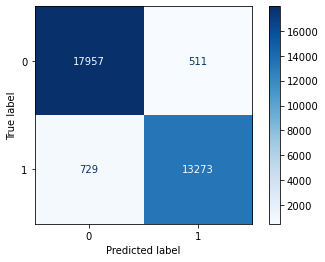

In [16]:
# Confusion Matrix
plot_confusion_matrix(model,x,y,cmap=plt.cm.Blues)
# Classification Report
print(classification_report(y,model.predict(x)))
